### Data Preprocessing: Load Data, Handle Missing Values, Inspect Structure, Outliers, and Modify EDUCATION Column


Shape of the dataset: (30000, 25)
First few rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5

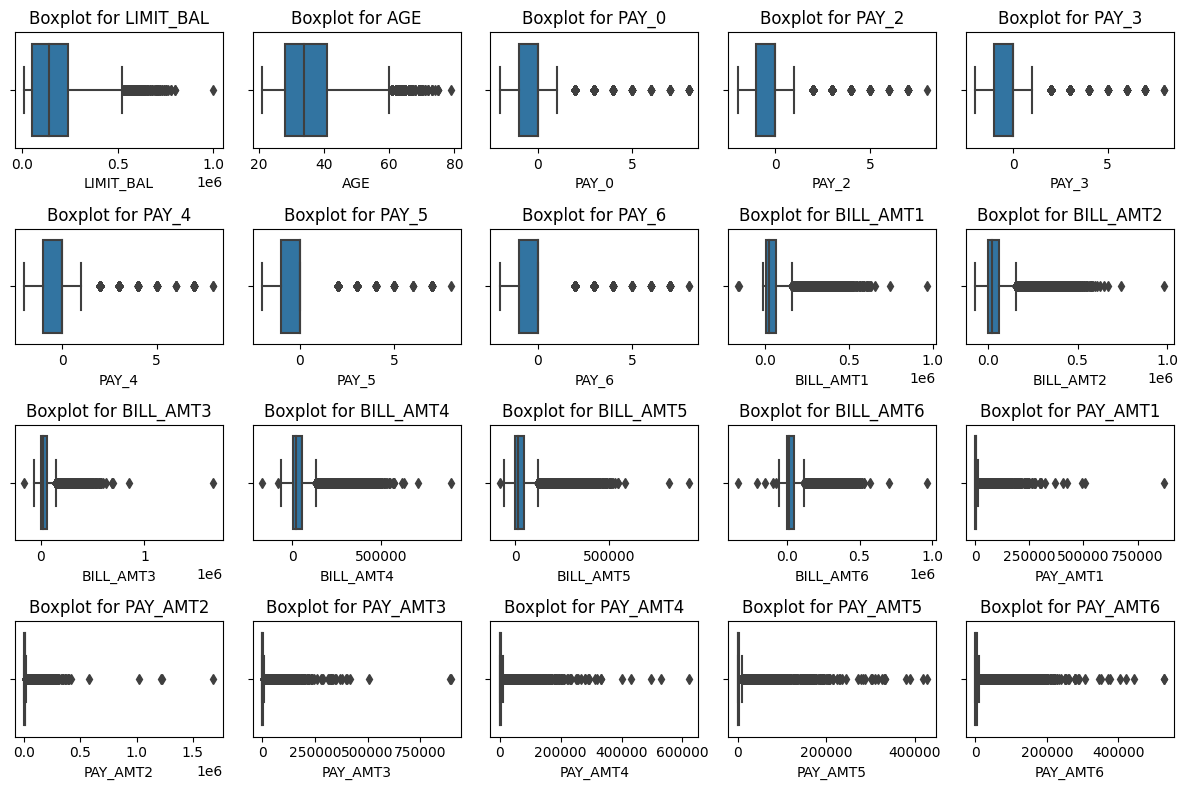

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Client_Data.csv')

# Inspect the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle the EDUCATION column: Replace 5 and 6 with 4 (others)
df['EDUCATION'] = df['EDUCATION'].replace({5: 4, 6: 4})

# After preprocessing: Recheck the changes in EDUCATION column
print("\nUnique values in EDUCATION column after replacement:")
print(df['EDUCATION'].unique())

# Outlier detection using IQR method
# Select numerical columns for outlier detection
numerical_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                  'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: values outside of the bounds are considered outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))

# Count the number of outliers in each column
print("\nNumber of outliers in each numerical column:")
print(outliers.sum())

# Show the rows with outliers for further analysis
outlier_rows = df[outliers.any(axis=1)]

print("\nRows containing outliers:")
print(outlier_rows)

# Show the ranges (lower and upper bounds) for each numerical column
print("\nLower and Upper bounds for each numerical column (IQR method):")
print(pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound}))

# Optionally, you can visualize the outliers using boxplots or histograms to see their distribution

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()



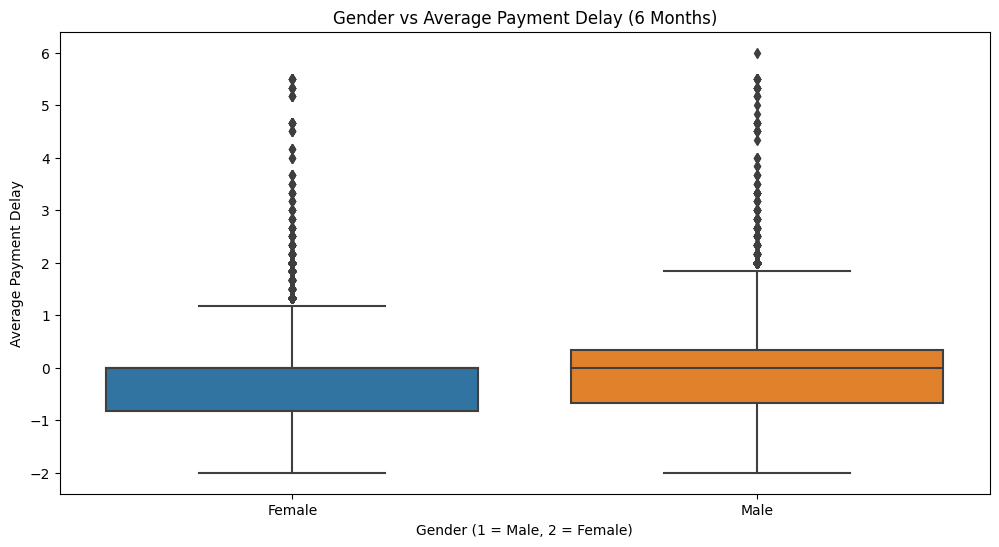

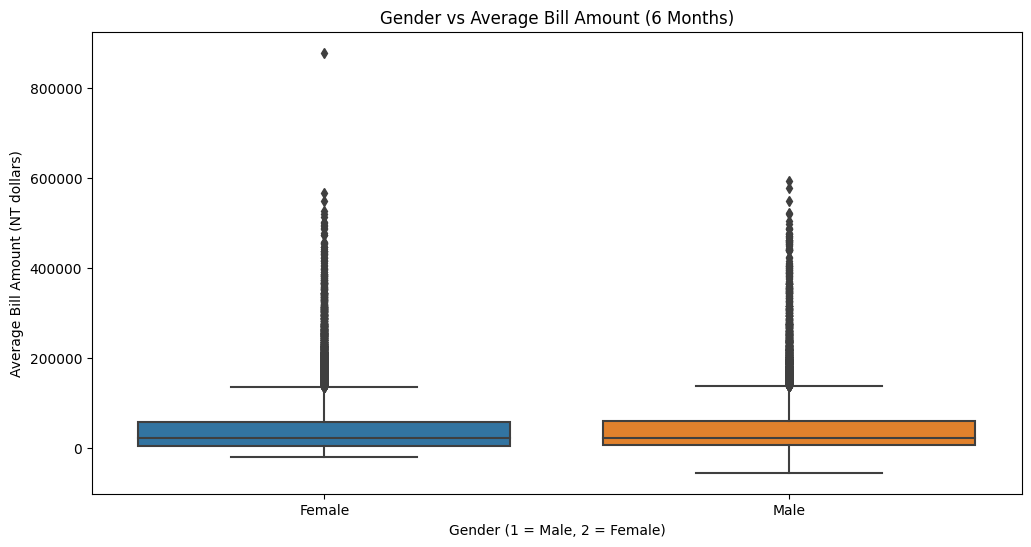

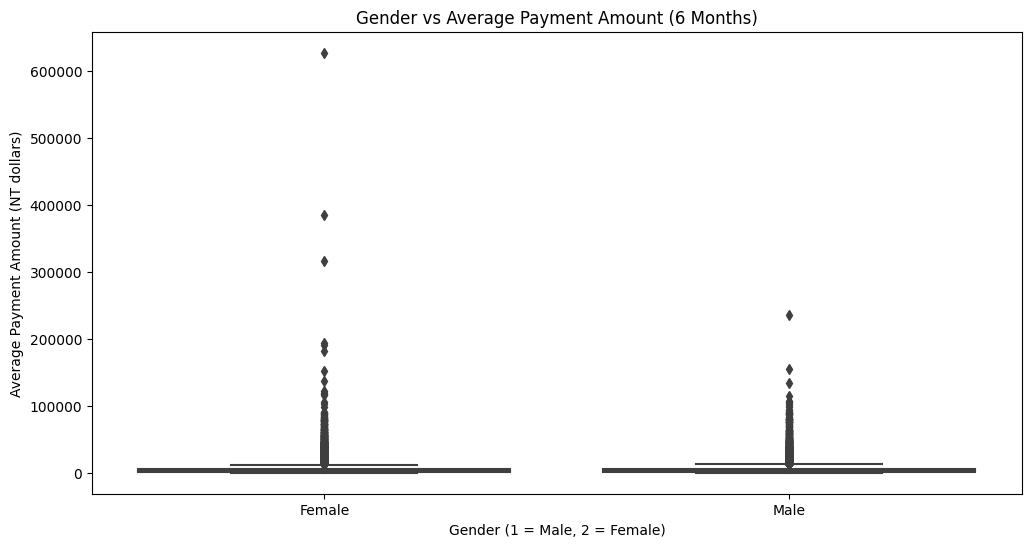

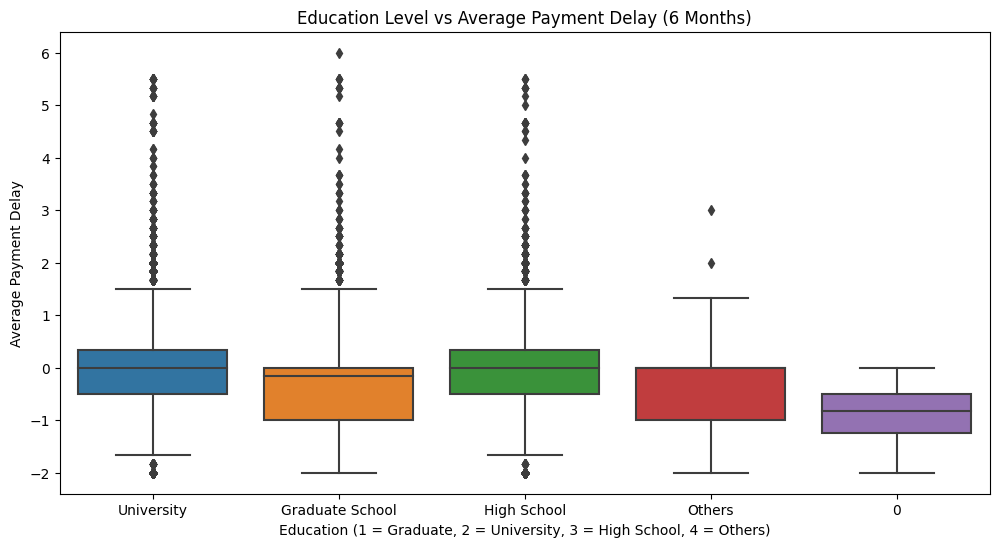

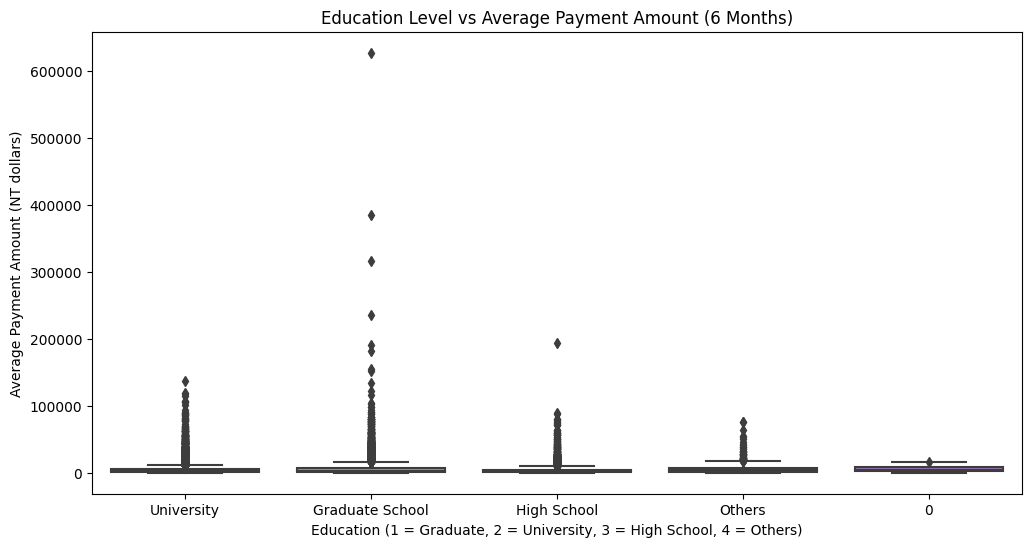

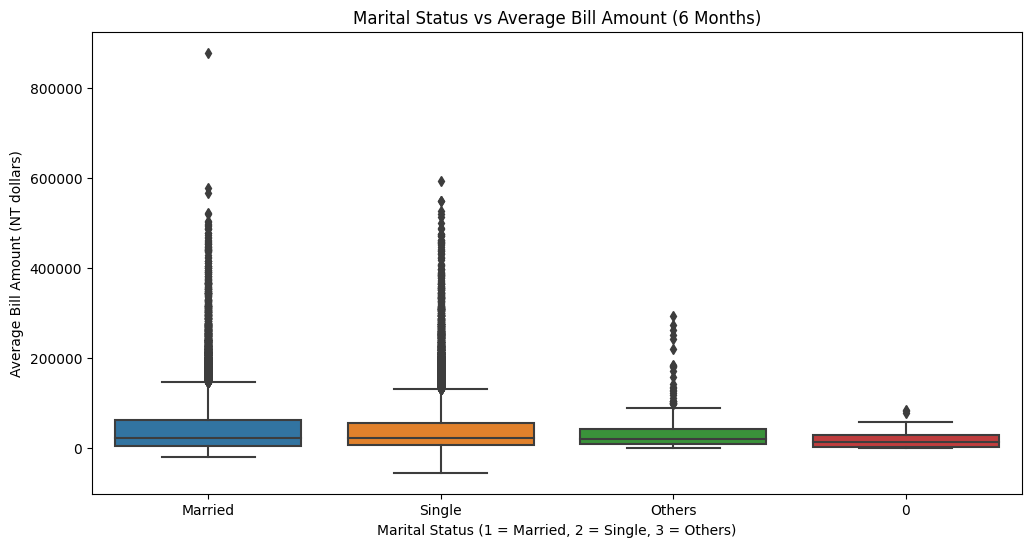

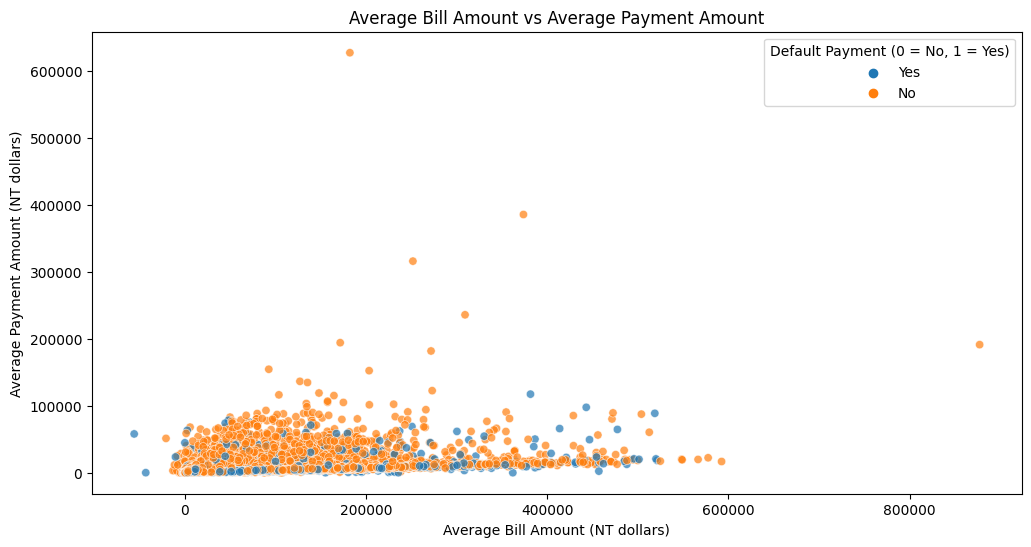

In [2]:
# Renaming the column
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.rename(columns={'default payment next month': 'default_payment'}, inplace=True)
df.replace({'default_payment' : {1 : 'Yes', 0 : 'No'}}, inplace = True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

# Calculate averages across the 6 months
df['AVG_PAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Updated Gender vs Average Payment Delay
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SEX', y='AVG_PAY')
plt.title('Gender vs Average Payment Delay (6 Months)')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Average Payment Delay')
plt.show()

# Updated Gender vs Average Bill Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SEX', y='AVG_BILL_AMT')
plt.title('Gender vs Average Bill Amount (6 Months)')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Average Bill Amount (NT dollars)')
plt.show()

# Updated Gender vs Average Payment Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SEX', y='AVG_PAY_AMT')
plt.title('Gender vs Average Payment Amount (6 Months)')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Average Payment Amount (NT dollars)')
plt.show()

# Education vs Average Payment Delay
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EDUCATION', y='AVG_PAY')
plt.title('Education Level vs Average Payment Delay (6 Months)')
plt.xlabel('Education (1 = Graduate, 2 = University, 3 = High School, 4 = Others)')
plt.ylabel('Average Payment Delay')
plt.show()

# Education vs Average Payment Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EDUCATION', y='AVG_PAY_AMT')
plt.title('Education Level vs Average Payment Amount (6 Months)')
plt.xlabel('Education (1 = Graduate, 2 = University, 3 = High School, 4 = Others)')
plt.ylabel('Average Payment Amount (NT dollars)')
plt.show()

# Marriage vs Average Bill Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MARRIAGE', y='AVG_BILL_AMT')
plt.title('Marital Status vs Average Bill Amount (6 Months)')
plt.xlabel('Marital Status (1 = Married, 2 = Single, 3 = Others)')
plt.ylabel('Average Bill Amount (NT dollars)')
plt.show()

# Rename the target column for easier usage
df.rename(columns={'default payment next month': 'default_payment'}, inplace=True)

# Re-run the scatter plot with the new column name
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='AVG_BILL_AMT', y='AVG_PAY_AMT', hue='default_payment', alpha=0.7)
plt.title('Average Bill Amount vs Average Payment Amount')
plt.xlabel('Average Bill Amount (NT dollars)')
plt.ylabel('Average Payment Amount (NT dollars)')
plt.legend(title='Default Payment (0 = No, 1 = Yes)')
plt.show()


## Key Insights from Exploratory Data Analysis

### 1. **Average Payment Delay by Gender**
- **Observation**: Both genders exhibit a median payment delay close to zero, but males show more extreme delays.
- **Implication**: Males might have a higher risk of delayed payments, and their payment behavior should be analyzed for default prediction.

### 2. **Average Bill Amount by Gender**
- **Observation**: Males tend to have slightly higher and more variable bill amounts compared to females.
- **Implication**: Males may be taking on larger credit, which could indicate a potential risk factor for financial instability.

### 3. **Average Payment Amount by Gender**
- **Observation**: Males have higher payment amounts with more significant outliers.
- **Implication**: Males might be paying more, but the high outliers suggest financial variability and potential risk for defaults.

### 4. **Average Payment Delay by Education Level**
- **Observation**: Higher education levels (Graduate/University) show more extreme delays.
- **Implication**: Highly educated individuals may take on larger credit, resulting in occasional payment delays. This group could be analyzed for default risks related to payment behavior.

### 5. **Average Bill Amount by Education Level**
- **Observation**: Higher education levels correlate with larger bill amounts and wider variability in payments.
- **Implication**: This suggests that higher education might be linked to higher financial activity but also potential financial stress. This warrants further analysis for predicting defaults.

### 6. **Average Bill Amount by Marital Status**
- **Observation**: Married individuals have higher and more consistent bill amounts compared to singles.
- **Implication**: Financial stability in married individuals could be leveraged in predictive models for default risks, while singles show more variability and might need different financial products or strategies.

### **Overall Insights**
- **Gender**: Males have more extreme payment delays and larger, more variable bill amounts, suggesting they may be at higher risk for defaults.
- **Education Level**: Higher education correlates with larger bill amounts and more frequent payment delays, indicating potential risks in this group.
- **Marital Status**: Married individuals show more financial stability with higher and more consistent bills, while singles show more financial variability, which could impact their default likelihood.


Default Payment Status:
default_payment
No     23364
Yes     6636
Name: count, dtype: int64

Gender Distribution:
SEX
Female    18112
Male      11888
Name: count, dtype: int64

Marital Status Distribution:
MARRIAGE
Single     15964
Married    13659
Others       323
0             54
Name: count, dtype: int64


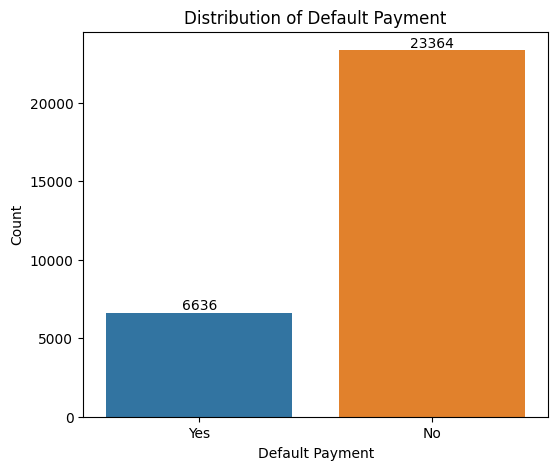

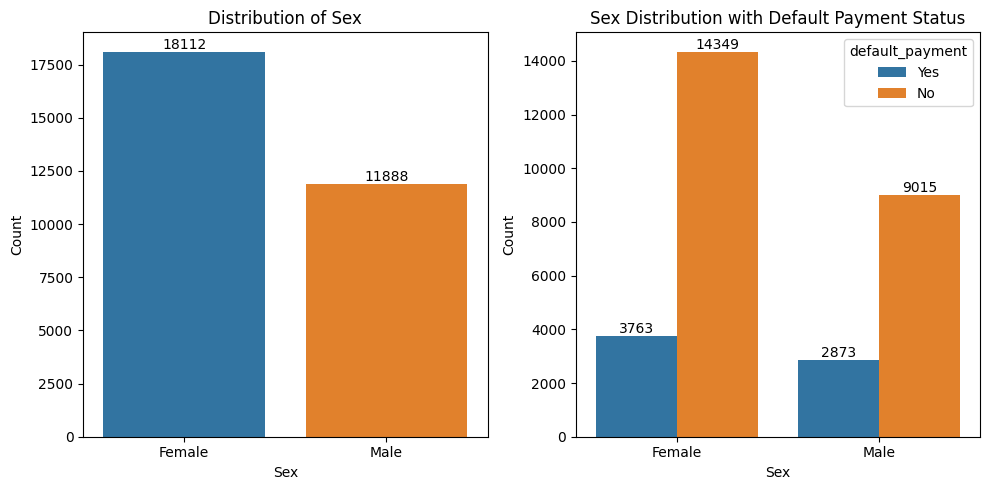

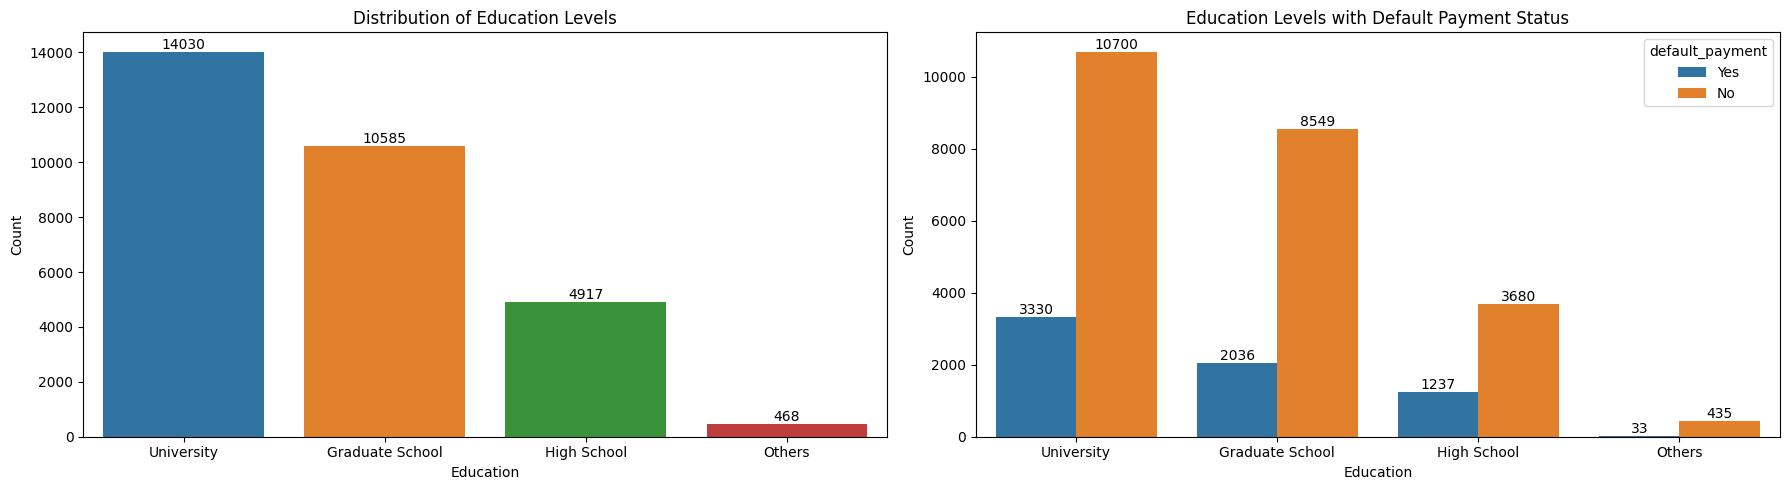

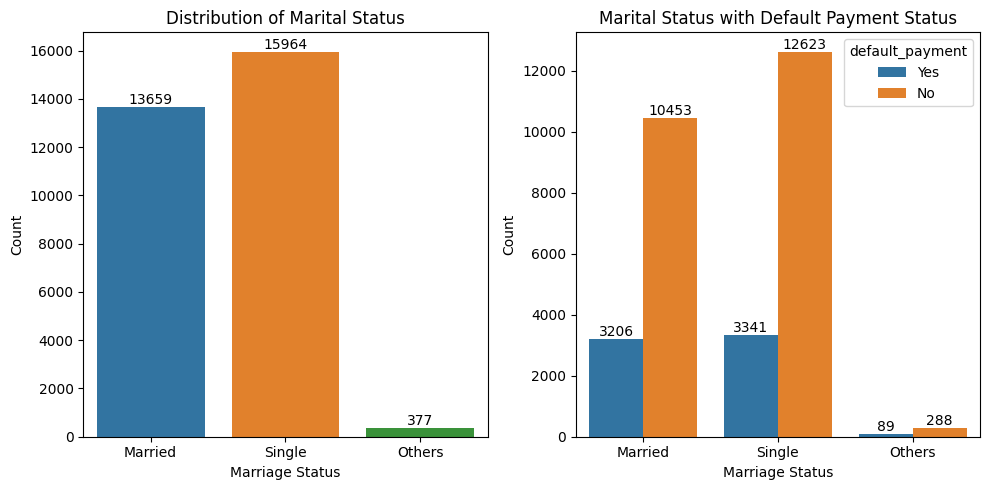

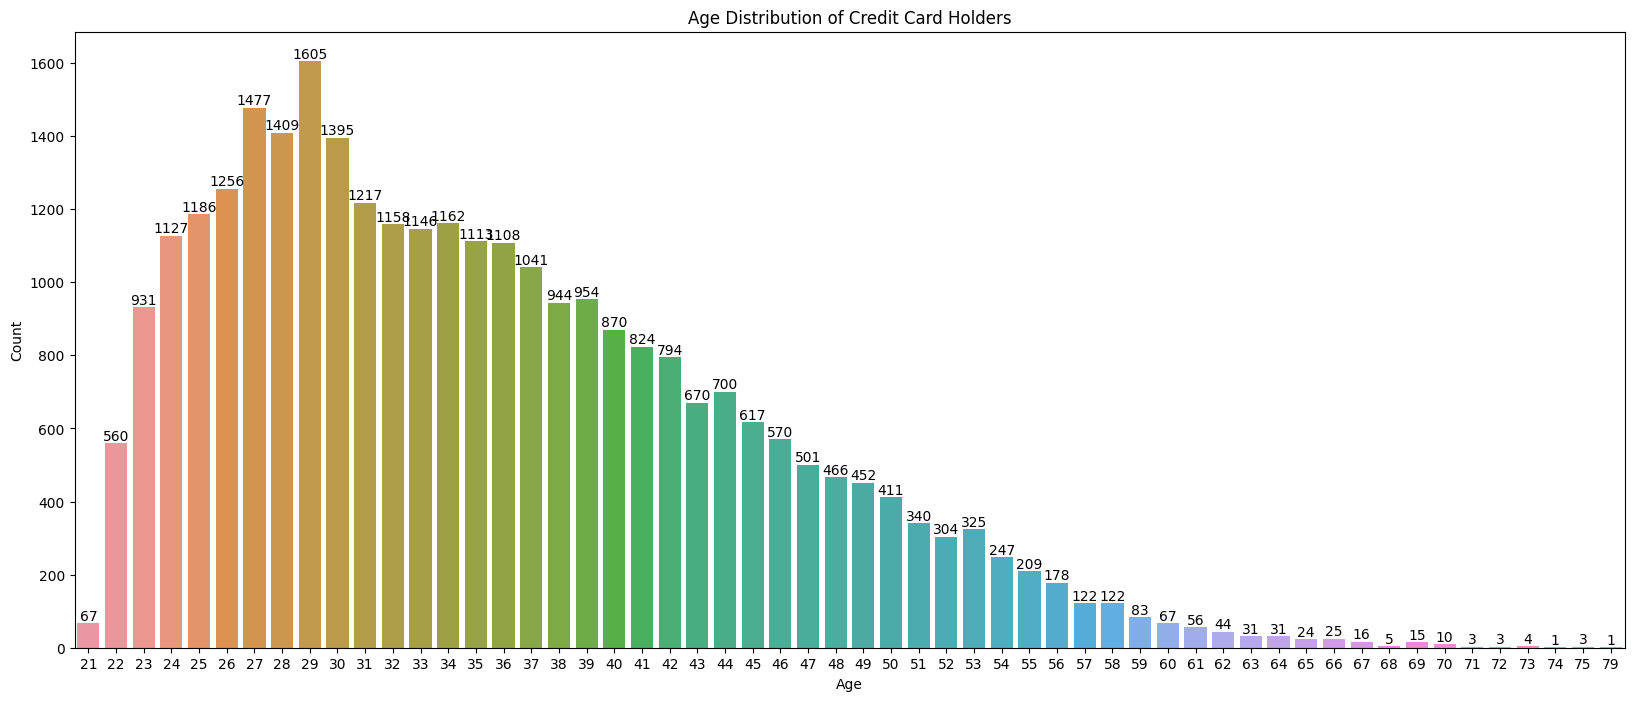

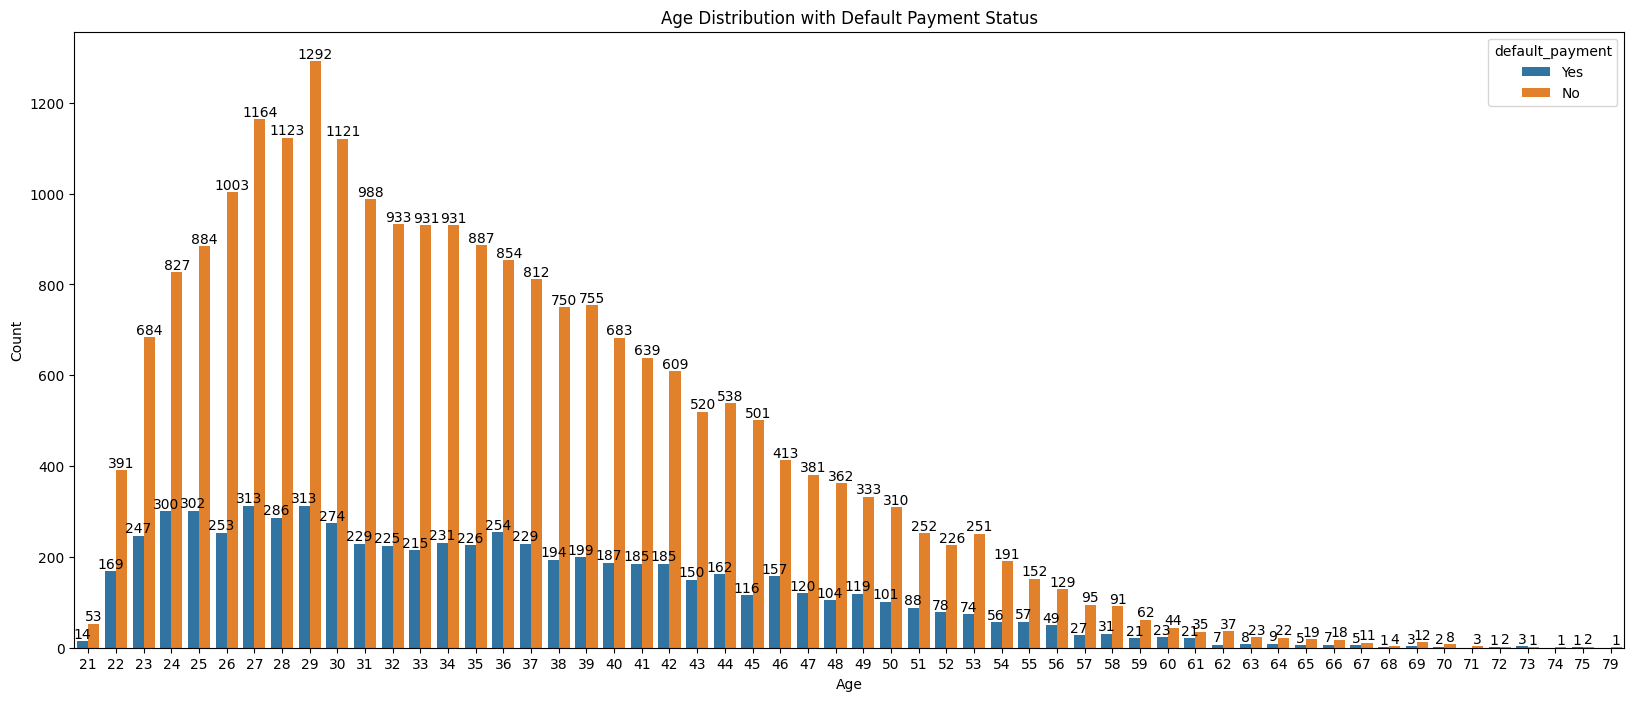

In [3]:
# Import necessary library for annotations
from matplotlib.patches import Rectangle

# Removing any leading or trailing spaces from column names
df.columns = df.columns.str.strip()


# Value counts for default_payment
print("Default Payment Status:")
print(df['default_payment'].value_counts())

# Value counts for SEX
print("\nGender Distribution:")
print(df['SEX'].value_counts())

# Value counts for marriage category
print("\nMarital Status Distribution:")
print(df['MARRIAGE'].value_counts())

# Function to annotate bars
def add_annotations(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only annotate non-zero heights
            ax.annotate(f'{int(height)}', 
                        (patch.get_x() + patch.get_width() / 2, height), 
                        ha='center', 
                        va='bottom', 
                        fontsize=10, 
                        color='black')

# Value count plot for default_payment
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='default_payment', data=df)
add_annotations(ax)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.show()

# Count plot for SEX with respect to default_payment
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Plot for SEX distribution
ax1 = sns.countplot(x='SEX', ax=axes[0], data=df)
add_annotations(ax1)
axes[0].set_title('Distribution of Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Plot for SEX with respect to default_payment
ax2 = sns.countplot(x='SEX', hue='default_payment', ax=axes[1], data=df)
add_annotations(ax2)
axes[1].set_title('Sex Distribution with Default Payment Status')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Education - Handling unknown values
fil = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)
df.loc[fil, 'EDUCATION'] = 'Others'

# Count plot for EDUCATION with respect to default_payment
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

# Plot for EDUCATION distribution
ax1 = sns.countplot(x='EDUCATION', ax=axes[0], data=df)
add_annotations(ax1)
axes[0].set_title('Distribution of Education Levels')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Plot for EDUCATION with respect to default_payment
ax2 = sns.countplot(x='EDUCATION', hue='default_payment', ax=axes[1], data=df)
add_annotations(ax2)
axes[1].set_title('Education Levels with Default Payment Status')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Marriage - Handling unknown values
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 'Others'

# Count plot for MARRIAGE with respect to default_payment
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Plot for MARRIAGE distribution
ax1 = sns.countplot(x='MARRIAGE', ax=axes[0], data=df)
add_annotations(ax1)
axes[0].set_title('Distribution of Marital Status')
axes[0].set_xlabel('Marriage Status')
axes[0].set_ylabel('Count')

# Plot for MARRIAGE with respect to default_payment
ax2 = sns.countplot(x='MARRIAGE', hue='default_payment', ax=axes[1], data=df)
add_annotations(ax2)
axes[1].set_title('Marital Status with Default Payment Status')
axes[1].set_xlabel('Marriage Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Count plot for AGE distribution
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='AGE', data=df)
add_annotations(ax)
plt.title('Age Distribution of Credit Card Holders')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Count plot for AGE with respect to default_payment
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='AGE', hue='default_payment', data=df)
add_annotations(ax)
plt.title('Age Distribution with Default Payment Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
